In [5]:
import pandas as pd
df = pd.read_csv("/content/Top_Highest_Openings.csv")
print(df.head())
npdf = df.to_numpy()


                                      Release    Opening  Total Gross  \
0                           Avengers: Endgame  357115007    858373000   
1                     Spider-Man: No Way Home  260138569    804793477   
2                      Avengers: Infinity War  257698183    678815482   
3  Star Wars: Episode VII - The Force Awakens  247966675    936662225   
4     Star Wars: Episode VIII - The Last Jedi  220009584    620181382   

   % of Total  Theaters  Average        Date  \
0        41.6      4662    76601  26-04-2019   
1        32.3      4336    59995  17-12-2021   
2        38.0      4474    57599  27-04-2018   
3        26.5      4134    59982  18-12-2015   
4        35.5      4232    51987  15-12-2017   

                           Distributor  
0  Walt Disney Studios Motion Pictures  
1              Sony Pictures Releasing  
2  Walt Disney Studios Motion Pictures  
3  Walt Disney Studios Motion Pictures  
4  Walt Disney Studios Motion Pictures  


In [ ]:
!pip install matplotlib==3.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.4.0-cp310-cp310-linux_x86_64.whl size=10425837 sha256=4023aa21235bde15f0936980264967f16fb6b9579099fd48be2f64beb9e7c179
  Stored in directory: /root/.cache/pip/wheels/27/ea/35/0964d59ed4c7270bbeabc79c0984b58d72f9e4463746bf7062
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires matplotlib>=3.7.1, but you have matplotlib 3.4.0 which is incompatible.
mizani 0.9.3 requires matplotlib>=3.5.0, but you have matplotlib 3.4.0 which is incompatible.
plotnine 0.12.4 requires matplotli

In [7]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np

<ipython-input-7-be473563e608>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


plot 1

Text(0, 0.5, 'Opening Sales (Millions)')

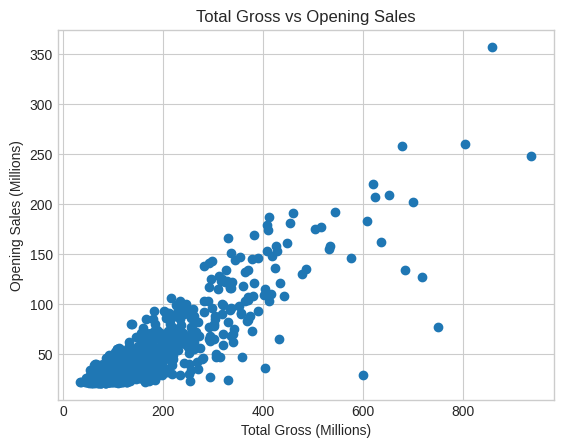

In [12]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(df['Total Gross']/1e6, df['Opening']/1e6)
ax.set_title('Total Gross vs Opening Sales')
ax.set_xlabel('Total Gross (Millions)')
ax.set_ylabel('Opening Sales (Millions)')



plot 2

<ipython-input-54-00c783768152>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_gross['Millions'] = top_gross['Total Gross']/1000000


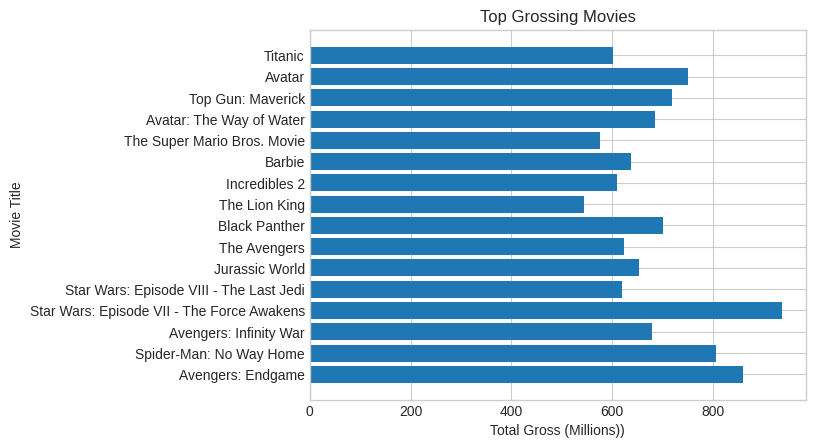

In [54]:
top_gross = df[df['Total Gross'] >= df['Total Gross'].max()-400000000]
top_gross['Millions'] = top_gross['Total Gross']/1000000
gross_array = top_gross['Millions'].to_numpy()
release_array = top_gross['Release'].to_numpy()

fig = plt.figure()
ax = plt.axes()

ax.barh(release_array, gross_array)
ax.set_ylabel('Movie Title')
ax.set_xlabel('Total Gross (Millions))')
ax.set_title('Top Grossing Movies');

plt.show()

plot 3

<ipython-input-66-2e4fc48ad847>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Year'] = pd.to_datetime(df['Date']).dt.year


              Distributor  Year     Millions
0                       -  2006    90.710620
1                       -  2007    58.272029
2                       -  2023   214.645953
3    20th Century Studios  2020    62.342368
4    20th Century Studios  2021   121.626598
..                    ...   ...          ...
294          Warner Bros.  2020    84.158461
295          Warner Bros.  2021   443.610658
296          Warner Bros.  2022   878.045703
297          Warner Bros.  2023  1453.481794
298          Warner Bros.  2024   399.896217

[299 rows x 3 columns]


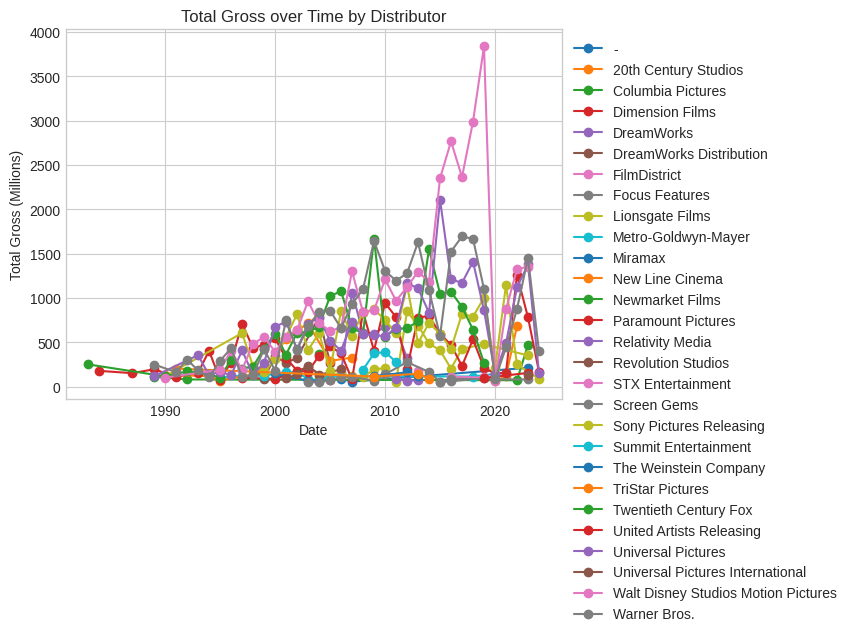

In [66]:
df['Millions'] = df['Total Gross']/1000000
df['Year'] = pd.to_datetime(df['Date']).dt.year
gross_by_dist_year = df.groupby(['Distributor', 'Year']).agg({'Millions': 'sum'}).reset_index()

fig = plt.figure()
ax = plt.axes()

for distributor in gross_by_dist_year['Distributor'].unique():
    data = gross_by_dist_year[gross_by_dist_year['Distributor'] == distributor]
    years = data['Year'].values
    total_gross_mills = data['Millions'].values
    ax.plot(years, total_gross_mills, marker='o', label=distributor)

ax.set_title('Total Gross Per Year by Distributor')
ax.set_xlabel('Date')
ax.set_ylabel('Total Gross (Millions)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()